In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (roc_auc_score, precision_recall_curve, 
                             auc, confusion_matrix, classification_report,
                             precision_score, recall_score,  f1_score)

from catboost import CatBoostClassifier

import umap
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

# Загрузка данных

In [5]:
df = pd.read_csv(r'C:\Users\Anast.Andreeva1\.cache\kagglehub\datasets\mlg-ulb\creditcardfraud\versions\3\creditcard.csv')

In [6]:
print(df.shape)
print(df.dtypes.value_counts())
print(df.columns.tolist())
print("="*140)
print(df.head())

(284807, 31)
float64    30
int64       1
Name: count, dtype: int64
['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount', 'Class']
   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.1

# Пропуски

In [7]:
missing_pct = df.isnull().sum() / len(df) * 100
print(missing_pct[missing_pct > 0])

Series([], dtype: float64)


# Основные статистики

In [8]:
# Описательная статистика

print(df.describe().T)

           count          mean           std         min           25%  \
Time    284807.0  9.481386e+04  47488.145955    0.000000  54201.500000   
V1      284807.0  1.168375e-15      1.958696  -56.407510     -0.920373   
V2      284807.0  3.416908e-16      1.651309  -72.715728     -0.598550   
V3      284807.0 -1.379537e-15      1.516255  -48.325589     -0.890365   
V4      284807.0  2.074095e-15      1.415869   -5.683171     -0.848640   
V5      284807.0  9.604066e-16      1.380247 -113.743307     -0.691597   
V6      284807.0  1.487313e-15      1.332271  -26.160506     -0.768296   
V7      284807.0 -5.556467e-16      1.237094  -43.557242     -0.554076   
V8      284807.0  1.213481e-16      1.194353  -73.216718     -0.208630   
V9      284807.0 -2.406331e-15      1.098632  -13.434066     -0.643098   
V10     284807.0  2.239053e-15      1.088850  -24.588262     -0.535426   
V11     284807.0  1.673327e-15      1.020713   -4.797473     -0.762494   
V12     284807.0 -1.247012e-15      0.

In [9]:
print("\n\nКоличество уникальных значений и корреляция:")
print("="*70)
print(f"Уникальные значения в каждой колонке:")
print(df.nunique().head(31))



Количество уникальных значений и корреляция:
Уникальные значения в каждой колонке:
Time      124592
V1        275663
V2        275663
V3        275663
V4        275663
V5        275663
V6        275663
V7        275663
V8        275663
V9        275663
V10       275663
V11       275663
V12       275663
V13       275663
V14       275663
V15       275663
V16       275663
V17       275663
V18       275663
V19       275663
V20       275663
V21       275663
V22       275663
V23       275663
V24       275663
V25       275663
V26       275663
V27       275663
V28       275663
Amount     32767
Class          2
dtype: int64


In [10]:
print("\n\nСТАТИСТИКА ПО ТРАНЗАКЦИЯМ:")
print("="*70)
print(f"Легальные транзакции (Class=0): {(df['Class']==0).sum()} ({(df['Class']==0).sum()/len(df)*100:.2f}%)")
print(f"Мошенические транзакции (Class=1): {(df['Class']==1).sum()} ({(df['Class']==1).sum()/len(df)*100:.2f}%)")



СТАТИСТИКА ПО ТРАНЗАКЦИЯМ:
Легальные транзакции (Class=0): 284315 (99.83%)
Мошенические транзакции (Class=1): 492 (0.17%)


In [11]:
print("\n\nСРАВНЕНИЕ AMOUNT ПО КЛАССАМ:")
print("="*70)
print(df.groupby('Class')['Amount'].describe())



СРАВНЕНИЕ AMOUNT ПО КЛАССАМ:
          count        mean         std  min   25%    50%     75%       max
Class                                                                      
0      284315.0   88.291022  250.105092  0.0  5.65  22.00   77.05  25691.16
1         492.0  122.211321  256.683288  0.0  1.00   9.25  105.89   2125.87


# Гистограмы

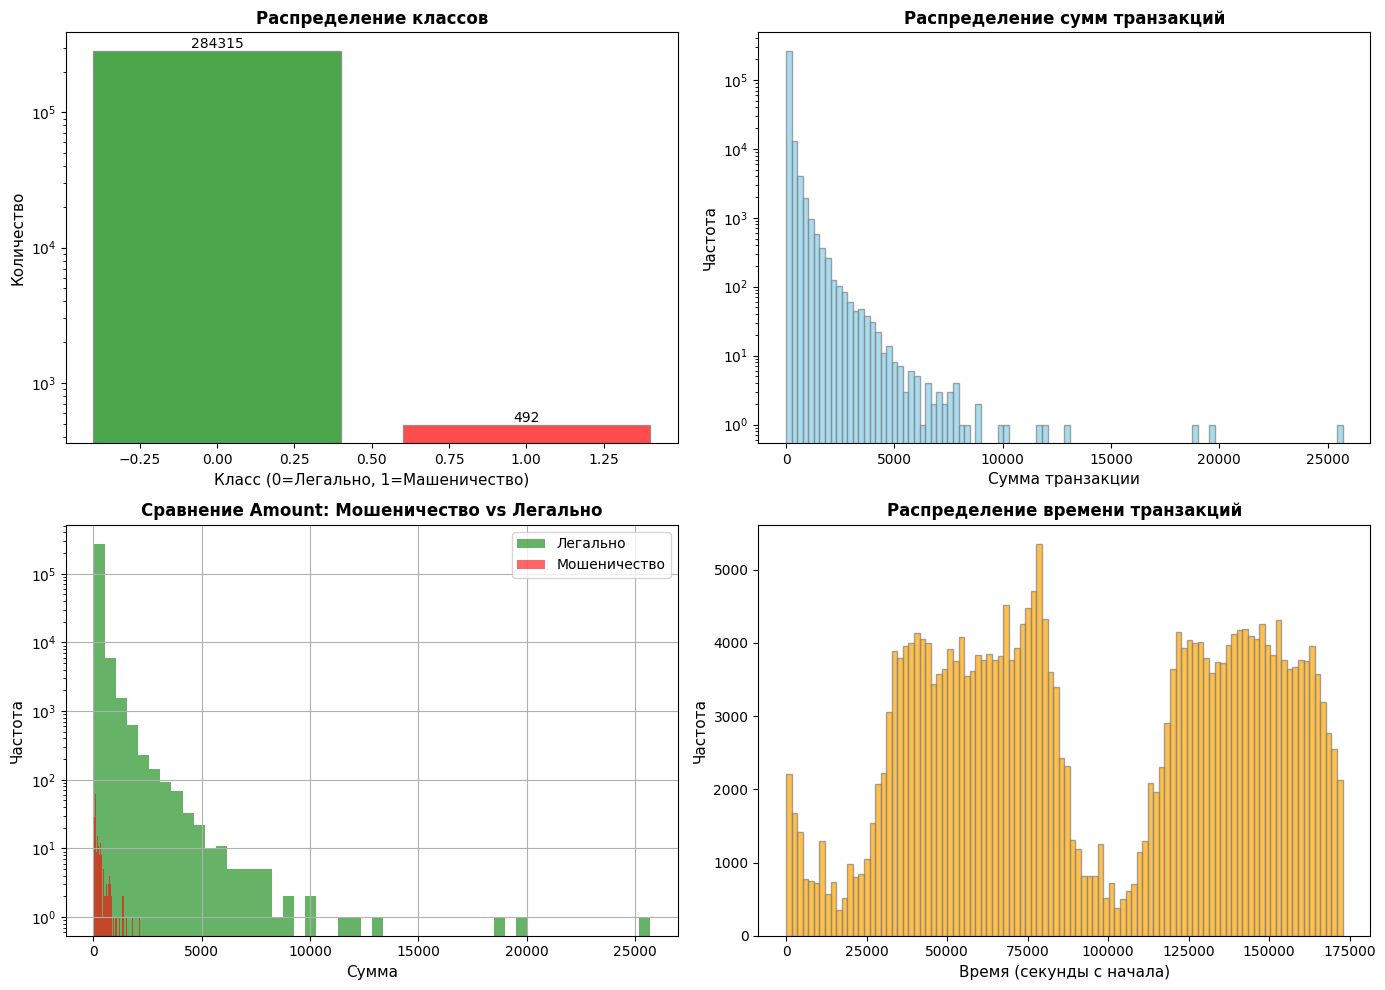

In [12]:
# Распределение целевого класса
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# 1. Гистограмма классов
ax1 = axes[0, 0]
class_counts = df['Class'].value_counts()
colors = ['green', 'red']
ax1.bar(class_counts.index, class_counts.values, color=colors, alpha=0.7, edgecolor='grey')
ax1.set_xlabel('Класс (0=Легально, 1=Машеничество)', fontsize=11)
ax1.set_ylabel('Количество', fontsize=11)
ax1.set_title('Распределение классов', fontsize=12, fontweight='bold')
ax1.set_yscale('log')
for i, v in enumerate(class_counts.values):
    ax1.text(i, v, str(v), ha='center', va='bottom')

# 2. Распределение Amount (сумма)
ax2 = axes[0, 1]
ax2.hist(df['Amount'], bins=100, color='skyblue', edgecolor='grey', alpha=0.7)
ax2.set_xlabel('Сумма транзакции', fontsize=11)
ax2.set_ylabel('Частота', fontsize=11)
ax2.set_title('Распределение сумм транзакций', fontsize=12, fontweight='bold')
ax2.set_yscale('log')

# 3. Amount для фродовых vs легальных
ax3 = axes[1, 0]
df[df['Class']==0]['Amount'].hist(bins=50, alpha=0.6, label='Легально', color='green', ax=ax3)
df[df['Class']==1]['Amount'].hist(bins=50, alpha=0.6, label='Мошеничество', color='red', ax=ax3)
ax3.set_xlabel('Сумма', fontsize=11)
ax3.set_ylabel('Частота', fontsize=11)
ax3.set_title('Сравнение Amount: Мошеничество vs Легально', fontsize=12, fontweight='bold')
ax3.legend()
ax3.set_yscale('log')

# 4. Time распределение
ax4 = axes[1, 1]
ax4.hist(df['Time'], bins=100, color='orange', edgecolor='grey', alpha=0.7)
ax4.set_xlabel('Время (секунды с начала)', fontsize=11)
ax4.set_ylabel('Частота', fontsize=11)
ax4.set_title('Распределение времени транзакций', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()


# Гистограммы PCA-признаков

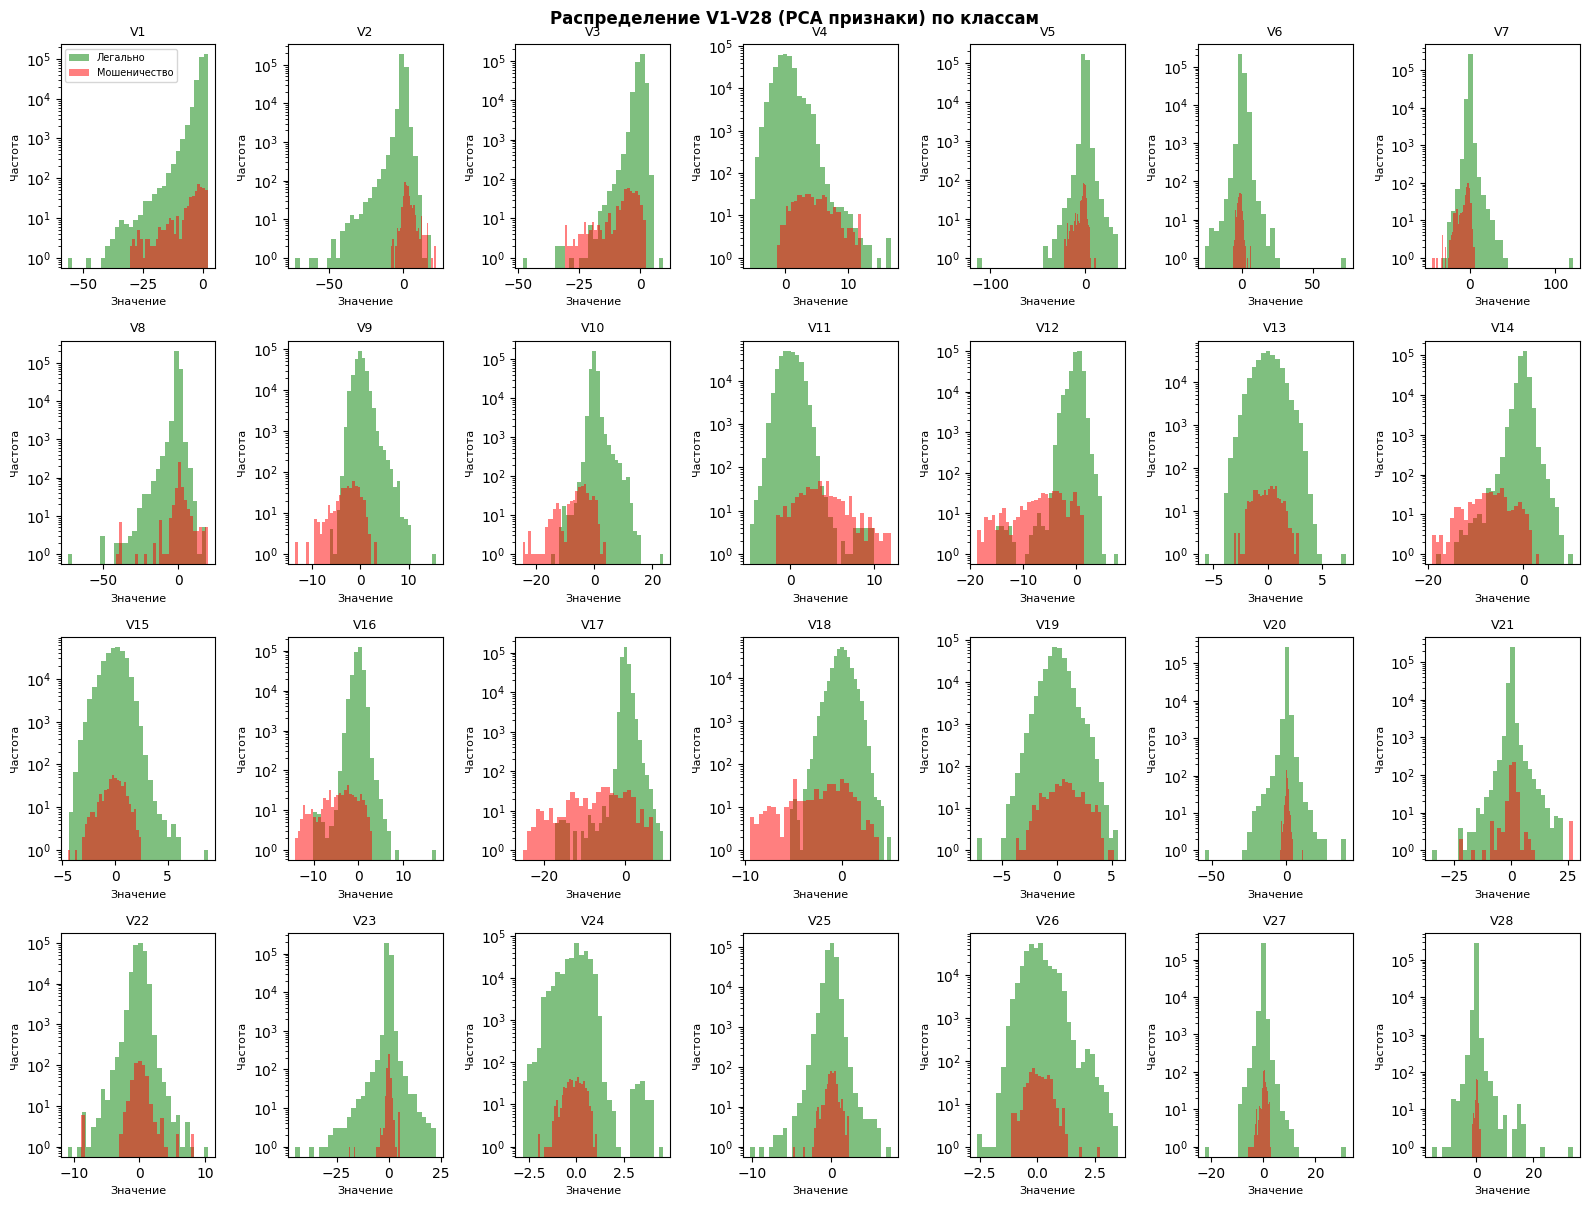

In [13]:
# Признаки V1, V2, … V28 — это главные компоненты, полученные с помощью PCA (из описания)
fig, axes = plt.subplots(4, 7, figsize=(16, 12))
axes = axes.ravel()

for i in range(28):
    ax = axes[i]
    v_col = f'V{i+1}'
    
    # Мошеничество (красный) и Легально (зеленый)
    ax.hist(df[df['Class']==0][v_col], bins=30, alpha=0.5, color='green', label='Легально')
    ax.hist(df[df['Class']==1][v_col], bins=30, alpha=0.5, color='red', label='Мошеничество')
    
    ax.set_title(f'{v_col}', fontsize=9)
    ax.set_xlabel('Значение', fontsize=8)
    ax.set_ylabel('Частота', fontsize=8)
    if i == 0:
        ax.legend(fontsize=7)
    ax.set_yscale('log')

plt.tight_layout()
plt.suptitle('Распределение V1-V28 (PCA признаки) по классам', y=1.001, fontsize=12, fontweight='bold')
plt.show()


# Аномалии

In [14]:
# Подсчет процента аномалий (мошеничество)
total_records = len(df)
fraud_records = df['Class'].sum()
error_rate = (fraud_records / total_records) * 100

print("="*60)
print("ОЦЕНКА ЗАГРЯЗНЕННОСТИ ДАННЫХ")
print("="*60)
print(f"Общее количество транзакций: {total_records:,}")
print(f"Мошенические транзакции (аномалии): {fraud_records:,}")
print(f"Процент аномалий: {error_rate:.4f}%")
print(f"Чистых записей: {100 - error_rate:.4f}%")
print("="*60)


ОЦЕНКА ЗАГРЯЗНЕННОСТИ ДАННЫХ
Общее количество транзакций: 284,807
Мошенические транзакции (аномалии): 492
Процент аномалий: 0.1727%
Чистых записей: 99.8273%


In [15]:
# Экспертные пороги на основе реальной загрязненности
print("\nПОРОГОВЫЕ ЗНАЧЕНИЯ ДЛЯ ОЦЕНКИ МОДЕЛЕЙ")
print("="*50)

# Ожидаемая точность обнаружения (реальная доля мошеничества)
expected_recall_threshold = 0.7  # Минимум 70% машеничества должно быть найдено
expected_precision_threshold = 0.05  # Точность 5%+ при сильном дисбалансе

print(f"Ожидаемый Recall: ≥ {expected_recall_threshold*100}%")
print(f"Ожидаемая Precision: ≥ {expected_precision_threshold*100}%")
print(f"Ожидаемая доля найденных аномалий: ≈{error_rate:.3f}% от всего датасета")



ПОРОГОВЫЕ ЗНАЧЕНИЯ ДЛЯ ОЦЕНКИ МОДЕЛЕЙ
Ожидаемый Recall: ≥ 70.0%
Ожидаемая Precision: ≥ 5.0%
Ожидаемая доля найденных аномалий: ≈0.173% от всего датасета


In [16]:
def data_quality_assessment(df):
    metrics = {}
    
    # 1. Коэффициент ошибок (из Class)
    metrics['Коэффициент ошибок'] = (df['Class'].sum() / len(df)) * 100
    
    # 2. Полнота (нет пропусков)
    metrics['Полнота без пропусков'] = 100.0  # Нет NaN
    
    # 3. Уникальность (дубликаты)
    metrics['Уникальность'] = 100 * (1 - df.duplicated().sum() / len(df))
    
    # 4. Оодинаковые типы
    metrics['Одинаковые типы'] = 100.0  # Все float64/int64
    
    return metrics

quality_metrics = data_quality_assessment(df)
print("ПОЛНАЯ ОЦЕНКА КАЧЕСТВА ДАННЫХ")
print("="*50)
for metric, value in quality_metrics.items():
    status = "✅" if value > 95 else "⚠️" if value > 90 else "❌"
    print(f"{status} {metric}: {value:.2f}%")


ПОЛНАЯ ОЦЕНКА КАЧЕСТВА ДАННЫХ
❌ Коэффициент ошибок: 0.17%
✅ Полнота без пропусков: 100.00%
✅ Уникальность: 99.62%
✅ Одинаковые типы: 100.00%


# Различные модели и алгоритмы

In [50]:
# Загрузка и подготовка
df = pd.read_csv(r'C:\Users\Anast.Andreeva1\.cache\kagglehub\datasets\mlg-ulb\creditcardfraud\versions\3\creditcard.csv')
X = df.drop('Class', axis=1)
y = df['Class']

In [51]:
# вычисляю мошенчество здесь для независимости ячейки
fraud_rate = y.sum() / len(y) 
print(f"Экспертная оценка загрязненности: {fraud_rate*100:.4f}%")

Экспертная оценка загрязненности: 0.1727%


## Random Forest 

In [36]:
# Стратифицированное разделение (сохраняем дисбаланс в train/test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

In [38]:
# Нормализация
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [41]:
# Параметры адаптированы под 0.17% аномалий
rf_model = RandomForestClassifier(
    n_estimators=200,           # Больше деревьев для редкого класса
    max_depth=15,               # Контроль сложности
    min_samples_leaf=5,         # Минимум 5 объектов в каждом листе
    class_weight='balanced',    # КРИТИЧНО для дисбаланса
    random_state=42,
    n_jobs=-1
)

rf_model.fit(X_train_scaled, y_train)
y_pred_rf = rf_model.predict(X_test_scaled)
y_pred_proba_rf = rf_model.predict_proba(X_test_scaled)[:, 1]

In [47]:
print("="*70)
print("RANDOM FOREST")
print("="*70)

# Метрики
roc_auc_rf = roc_auc_score(y_test, y_pred_proba_rf)
precision_rf, recall_rf, _ = precision_recall_curve(y_test, y_pred_proba_rf)
pr_auc_rf = auc(recall_rf, precision_rf)

print(f"ROC-AUC: {roc_auc_rf:.4f}")
print(f"PR-AUC: {pr_auc_rf:.4f}")
print(f"Recall (найде​но мошеничества): {recall_rf[-2]:.4f}")
print(f"\nОсобо важные признаки")
importances = pd.DataFrame({
    'feature': X.columns,
    'importance': rf_model.feature_importances_
}).nlargest(5, 'importance')
print(importances.to_string(index=False))

RANDOM FOREST
ROC-AUC: 0.9583
PR-AUC: 0.8100
Recall (найде​но мошеничества): 0.0068

Особо важные признаки
feature  importance
    V14    0.184009
     V4    0.126022
    V10    0.118409
    V17    0.094973
    V12    0.093819


## Logistic Regression

In [43]:
# Параметры для дисбаланса
lr_model = LogisticRegression(
    class_weight='balanced',    # Компенсирует 0.17% дисбаланс
    max_iter=1000,
    solver='lbfgs',
    random_state=42
)

In [44]:
lr_model.fit(X_train_scaled, y_train)
y_pred_lr = lr_model.predict(X_test_scaled)
y_pred_proba_lr = lr_model.predict_proba(X_test_scaled)[:, 1]

In [46]:
print("\n" + "="*70)
print("LOGISTIC REGRESSION")
print("="*70)

roc_auc_lr = roc_auc_score(y_test, y_pred_proba_lr)
precision_lr, recall_lr, _ = precision_recall_curve(y_test, y_pred_proba_lr)
pr_auc_lr = auc(recall_lr, precision_lr)

print(f"ROC-AUC: {roc_auc_lr:.4f}")
print(f"PR-AUC: {pr_auc_lr:.4f}")
print(f"Recall: {recall_lr[-2]:.4f}")

print(f"\nВажные коэффициенты (топ-5):")
coef_df = pd.DataFrame({
    'feature': X.columns,
    'coefficient': np.abs(lr_model.coef_).ravel()  # ← ДОБАВЬТЕ .ravel()
}).nlargest(5, 'coefficient')

print(coef_df.to_string(index=False))


LOGISTIC REGRESSION
ROC-AUC: 0.9681
PR-AUC: 0.7415
Recall: 0.4595

Важные коэффициенты (топ-5):
feature  coefficient
    V10     1.807402
     V1     1.793699
     V4     1.639101
 Amount     1.474943
    V14     1.390402


## CatBoost

In [52]:
# CatBoost с параметрами для дисбаланса
cb_model = CatBoostClassifier(
    iterations=500,
    depth=6,
    scale_pos_weight=1/fraud_rate - 1,  # ← Масштабирование под 0.17%
    loss_function='Logloss',
    eval_metric='AUC',
    verbose=0,
    random_state=42
)

In [53]:
cb_model.fit(X_train_scaled, y_train, 
             eval_set=(X_test_scaled, y_test),
             early_stopping_rounds=50)

In [54]:
y_pred_cb = cb_model.predict(X_test_scaled)
y_pred_proba_cb = cb_model.predict_proba(X_test_scaled)[:, 1]

In [55]:
print("\n" + "="*70)
print("CATBOOST")
print("="*70)

roc_auc_cb = roc_auc_score(y_test, y_pred_proba_cb)
precision_cb, recall_cb, _ = precision_recall_curve(y_test, y_pred_proba_cb)
pr_auc_cb = auc(recall_cb, precision_cb)

print(f"ROC-AUC: {roc_auc_cb:.4f}")
print(f"PR-AUC: {pr_auc_cb:.4f}")
print(f"Recall: {recall_cb[-2]:.4f}")

print(f"\nВажные признаки по CatBoost:")
feature_importance_cb = pd.DataFrame({
    'feature': X.columns,
    'importance': cb_model.feature_importances_
}).nlargest(5, 'importance')
print(feature_importance_cb.to_string(index=False))



CATBOOST
ROC-AUC: 0.9621
PR-AUC: 0.8033
Recall: 0.0068

Важные признаки по CatBoost:
feature  importance
     V4   11.023665
    V14    9.215663
    V12    6.004447
     V2    4.551322
    V19    4.540476


## Сравнение моделей

In [58]:
print("\n" + "="*70)
print("СРАВНЕНИЕ МОДЕЛЕЙ")
print("="*70)

comparison = pd.DataFrame({
    'Модель': ['Random Forest', 'Logistic Regression', 'CatBoost'],  
    'ROC-AUC': [roc_auc_rf, roc_auc_lr, roc_auc_cb],  
    'PR-AUC': [pr_auc_rf, pr_auc_lr, pr_auc_cb],      
    'Recall': [recall_rf[-2], recall_lr[-2], recall_cb[-2]] 
})

print(comparison.to_string(index=False))

# Лучшая модель
best_model_idx = np.argmax(comparison['ROC-AUC'])
print(f"\n ЛУЧШАЯ МОДЕЛЬ: {comparison.iloc[best_model_idx]['Модель']}")
print(f"   ROC-AUC: {comparison.iloc[best_model_idx]['ROC-AUC']:.4f}")



СРАВНЕНИЕ МОДЕЛЕЙ
             Модель  ROC-AUC   PR-AUC   Recall
      Random Forest 0.958343 0.809958 0.006757
Logistic Regression 0.968135 0.741550 0.459459
           CatBoost 0.962098 0.803340 0.006757

 ЛУЧШАЯ МОДЕЛЬ: Logistic Regression
   ROC-AUC: 0.9681


# classification_report и confusion_matrix

## classification_report

In [ ]:
print("="*80)
print("ОЦЕНКА КАЧЕСТВА LOGISTIC REGRESSION (ROC-AUC: 0.9681)")
print("="*80)

# Предсказания лучшей модели (Logistic Regression)
y_true = y_test
y_pred = y_pred_lr  # Предсказания по классам
y_pred_proba = y_pred_proba_lr  # Вероятности

# CLASSIFICATION REPORT
print("\n CLASSIFICATION REPORT")
print("="*40)
print(classification_report(y_true, y_pred, target_names=['Легально (0)', 'Машеничество (1)']))

ОЦЕНКА КАЧЕСТВА LOGISTIC REGRESSION (ROC-AUC: 0.9681)

 CLASSIFICATION REPORT
                  precision    recall  f1-score   support

    Легально (0)       1.00      0.98      0.99     85295
Машеничество (1)       0.07      0.88      0.12       148

        accuracy                           0.98     85443
       macro avg       0.53      0.93      0.56     85443
    weighted avg       1.00      0.98      0.99     85443



## confusion_matrix

In [60]:
# Confusion Matrix числовыми значениями
cm = confusion_matrix(y_true, y_pred)
cm_df = pd.DataFrame(cm, 
                     index=['Actual Машеничество', 'Actual Легально'],
                     columns=['Pred Машеничество', 'Pred Легально'])

print("\nCONFUSION MATRIX (абсолютные значения)")
print("="*40)
print(cm_df)

# Общий тест размер
total_test = len(y_test)
print(f"\nОбщий тест: {total_test:,} транзакций")
print(f"Реальные машеничество: {(y_test==1).sum():,} ({(y_test==1).sum()/total_test*100:.2f}%)")



CONFUSION MATRIX (абсолютные значения)
                     Pred Машеничество  Pred Легально
Actual Машеничество              83488           1807
Actual Легально                     18            130

Общий тест: 85,443 транзакций
Реальные машеничество: 148 (0.17%)


In [66]:
# Ручной расчет ключевых метрик

TN, FP, FN, TP = cm.ravel()
total = TN + FP + FN + TP

print("\nДЕТАЛЬНЫЙ РАЗБОР МЕТРИК")
print("="*40)
print(f"True Negative (TN):   {TN:,} ({TN/total*100:.1f}%)")
print(f"False Positive (FP):  {FP:,} ({FP/total*100:.1f}%)")
print(f"False Negative (FN):  {FN:,} ({FN/total*100:.1f}%)")
print(f"True Positive (TP):   {TP:,} ({TP/total*100:.1f}%)")



ДЕТАЛЬНЫЙ РАЗБОР МЕТРИК
True Negative (TN):   83,488 (97.7%)
False Positive (FP):  1,807 (2.1%)
False Negative (FN):  18 (0.0%)
True Positive (TP):   130 (0.2%)


In [76]:
print(f"\nКЛЮЧЕВЫЕ МЕТРИКИ ДЛЯ МОШЕНИЧЕСТВА:")
print(f"  Precision (Точность):      {precision_score(y_true, y_pred):.4f}")
print(f"  Recall (Полнота):          {recall_score(y_true, y_pred):.4f}")
print(f"  F1-Score:                  {f1_score(y_true, y_pred):.4f}")
print(f"  Support (Мошеничество):    {(y_test==1).sum()}")

# Оценка пропущенных фрод-транзакций
missed_fraud = FN
print(f"\n   ПРОПУЩЕННЫЙ МОШЕНИЧЕСТВО: {missed_fraud} транзакций")
print(f"   Потенциальные потери банка: {missed_fraud * df[df['Class']==1]['Amount'].mean():.0f}")


КЛЮЧЕВЫЕ МЕТРИКИ ДЛЯ МОШЕНИЧЕСТВА:
  Precision (Точность):      0.0671
  Recall (Полнота):          0.8784
  F1-Score:                  0.1247
  Support (Мошеничество):    148

   ПРОПУЩЕННЫЙ МОШЕНИЧЕСТВО: 18 транзакций
   Потенциальные потери банка: 2200


In [79]:
print("\n" + "="*80)
print("СРАВНЕНИЕ МОДЕЛЕЙ ПО КЛЮЧЕВЫМ МЕТРИКАМ")
print("="*80)

models = {
    'Logistic Regression': y_pred_lr,
    'Random Forest': y_pred_rf,
    'CatBoost': y_pred_cb
}

comparison_metrics = []
for name, y_pred_model in models.items():
    cm_model = confusion_matrix(y_true, y_pred_model)
    TN, FP, FN, TP = cm_model.ravel()
    
    comparison_metrics.append({
        'Модель': name,
        'Precision': precision_score(y_true, y_pred_model),
        'Recall': recall_score(y_true, y_pred_model),
        'F1': f1_score(y_true, y_pred_model),
        'TP (Найдено мошеничества)': TP,
        'FN (Пропущено мошеничества)': FN
    })

metrics_df = pd.DataFrame(comparison_metrics).round(4)
print(metrics_df.to_string(index=False))



СРАВНЕНИЕ МОДЕЛЕЙ ПО КЛЮЧЕВЫМ МЕТРИКАМ
             Модель  Precision  Recall     F1  TP (Найдено мошеничества)  FN (Пропущено мошеничества)
Logistic Regression     0.0671  0.8784 0.1247                        130                           18
      Random Forest     0.8626  0.7635 0.8100                        113                           35
           CatBoost     0.7160  0.8176 0.7634                        121                           27


In [81]:
# Logistic Regression - пропущено 18 транзакций (наименьшее значение)

# tSNE и/или UMAP для проверки разделения

## tSNE

In [89]:
# t-SNE на нормализованных данных (для стабильности)

tsne = TSNE(n_components=2, 
            perplexity=30,      # Ключевой параметр для дисбаланса
            random_state=42,
            n_iter=500)

# Применяю только к TRAIN (чтобы не использовать test в визуализации)
X_tsne = tsne.fit_transform(X_train_scaled[:10000]) # 10000 для скоротси

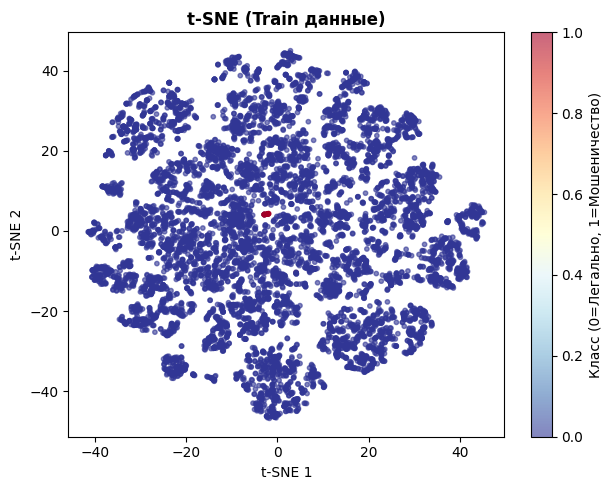

In [90]:
# График t-SNE
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
scatter = plt.scatter(X_tsne[:, 0], X_tsne[:, 1], 
                     c=y_train[:10000], cmap='RdYlBu_r', alpha=0.6, s=10)
plt.colorbar(scatter, label='Класс (0=Легально, 1=Мошеничество)')
plt.title('t-SNE (Train данные)', fontweight='bold')
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')

plt.tight_layout()
plt.show()


## UMAP

In [92]:
reducer = umap.UMAP(
    n_components=2,
    n_neighbors=15,     # Для дисбаланса 0.17%
    min_dist=0.1,
    metric='euclidean',
    random_state=42
)

X_umap = reducer.fit_transform(X_train_scaled[:10000]) 

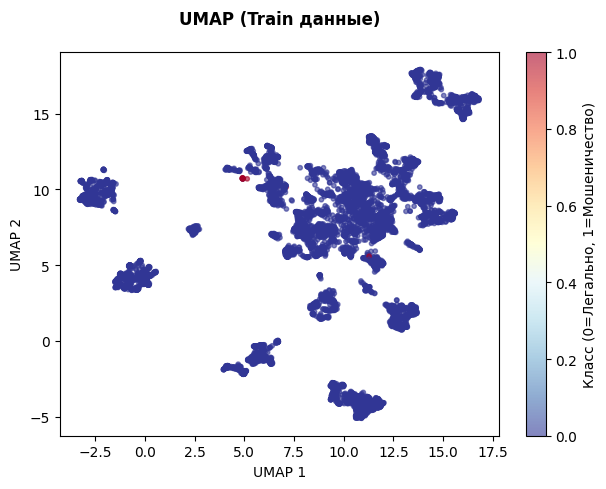

In [93]:
# График UMAP
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 2)
scatter_umap = plt.scatter(X_umap[:, 0], X_umap[:, 1], 
                          c=y_train[:10000], cmap='RdYlBu_r', alpha=0.6, s=10)
plt.colorbar(scatter_umap, label='Класс (0=Легально, 1=Мошеничество)')
plt.title('UMAP (Train данные)\n', fontweight='bold')
plt.xlabel('UMAP 1')
plt.ylabel('UMAP 2')

plt.tight_layout()
plt.show()

In [94]:
# Мошеничество четко отделено в 2D-пространстве!